# <h1><center>Sentiment analysis - Clothing Reviews</center></h1>

# Problema

Neste projeto, foi utilizado o conjunto de dados intitulado Women's E-Commerce Clothing Reviews, disponibilizado na plataforma Kaggle. Esse conjunto contém informações provenientes de avaliações textuais realizadas por clientes de uma loja virtual especializada em vestuário feminino.

A análise de avaliações de clientes configura-se como uma prática estratégica fundamental no contexto empresarial contemporâneo, uma vez que possibilita a obtenção de insights relevantes acerca da satisfação do consumidor, da percepção da qualidade dos produtos e da identificação de aspectos que demandam melhorias. A compreensão aprofundada das opiniões e sentimentos expressos pelos clientes permite que as organizações tomem decisões mais embasadas, orientando o aprimoramento de produtos, o redesenho de estratégias de marketing e o fortalecimento da experiência de compra.

Além disso, o estudo sistemático dessas avaliações pode auxiliar na detecção de tendências emergentes, na antecipação de demandas do mercado e na resolução proativa de eventuais problemas, promovendo, assim, uma relação mais personalizada e eficaz com o público-alvo. Em última instância, tais ações contribuem não apenas para o aumento da satisfação e da lealdade dos clientes, mas também para a maximização da competitividade e da rentabilidade da empresa no mercado.

O data set possui 23482 linhas e 10 features (atributos). Cada linha corresponde ao review do consumidor. Veja abaixo a lista de variávies dos dados.

`Clothing ID`: Variável categórica inteira que se refere à peça específica sendo avaliada.

`Age`: Variável inteira positiva que representa a idade do avaliador.

`Title`: Título da avaliação.

`Review Text`: Corpo da avaliação (texto).

`Rating`: Variável inteira ordinal positiva para a pontuação do produto dada pelo cliente, de 1 (Pior) a 5 (Melhor).

`Recommended IND`: Variável binária indicando se o cliente recomenda o produto, onde 1 é recomendado e 0 não é recomendado.

`Positive Feedback Count`: Inteiro positivo que documenta o número de outros clientes que consideraram esta avaliação positiva.

`Division Name`: Nome categórico da divisão de alto nível do produto.

`Department Name`: Nome categórico do departamento do produto.

`Class Name`: Nome categórico da classe do produto.

O dataset pode ser encontrado no link: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

# Análise de sentimentos

A análise de sentimento é uma tarefa fundamental no processamento de linguagem natural (NLP) e consiste em identificar e extrair sentimentos expressos em texto. No contexto deste dataset, a análise de sentimento pode ajudar a determinar a opinião dos clientes em relação aos produtos, o que pode fornecer insights valiosos para a loja. Por exemplo, a loja pode identificar produtos populares ou detectar problemas recorrentes com certos itens.

# Por que utilizar Redes Neurais?

As redes neurais têm se mostrado extremamente eficazes na resolução de problemas de NLP, especialmente para tarefas complexas como a análise de sentimento. As redes neurais podem capturar padrões complexos nos dados e lidar com a variabilidade e nuances da linguagem humana.

# Análise exploratória dos dados

## Leitura e pré-processamento dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregando o dataset
url = 'https://drive.google.com/uc?export=download&id=1JWgFjXbFya5hClMEdnAxU9WELh4Vnh0a'
df = pd.read_csv(url,index_col=0)

df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
# Verificar informações básicas do dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


Checamos a quantidade de NA em cada atributo da base de dados.

In [ ]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Para `Review Text` e `Title`, substituímos os NAs por strings vazias. Além disso, optamos por combinar o título e texto a avaliação em um único atributo, chamado `Combined_Text`.

In [ ]:
# Preencher dados de texto ausentes com strings vazias
df['Title'] = df['Title'].fillna('')
df['Review Text'] = df['Review Text'].fillna('')

# Combinar Título e Texto da Avaliação
df['Combined_Text'] = df['Title'] + ' ' + df['Review Text']

# Transformar dados qualitativos em dummies
df = pd.get_dummies(df, columns=['Division Name', 'Department Name', 'Class Name'], drop_first=False)

### Distribuição das Avaliações (Rating)

<ipython-input-6-aeedd67034f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


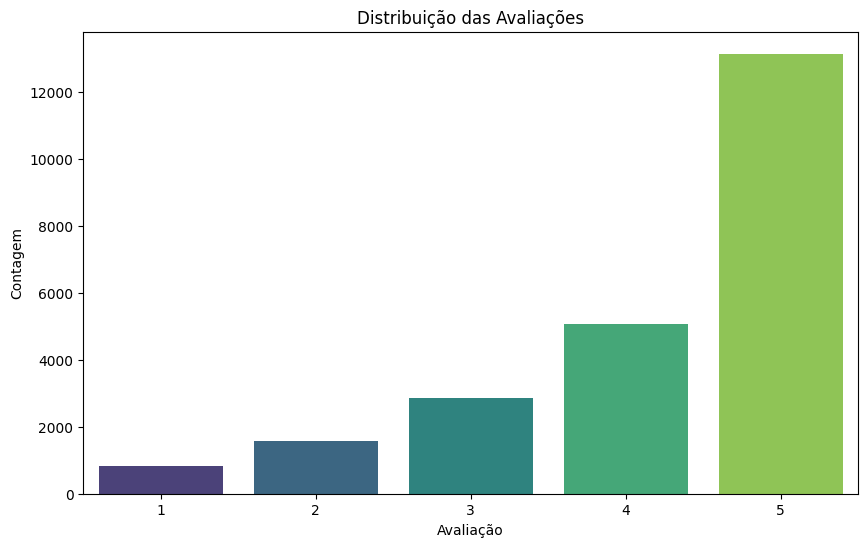

In [ ]:
# Plotar a distribuição das avaliações
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribuição das Avaliações')
plt.xlabel('Avaliação')
plt.ylabel('Contagem')
plt.show()

Vemos que grande parte das avaliações possuem nota 5. A contagem de avaliações decresce conforme os ratings dados decrescem também.

## Distribuição da Idade dos Avaliadores

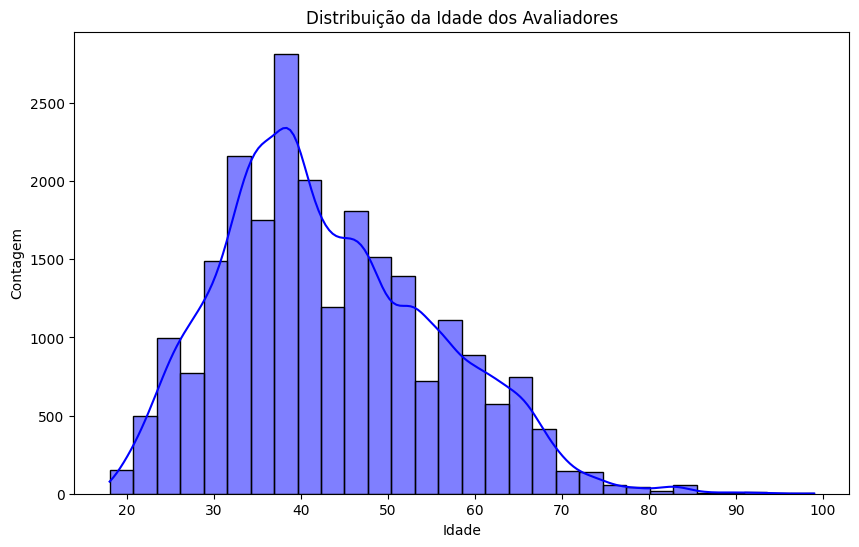

In [ ]:
# Plotar a distribuição da idade dos avaliadores
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribuição da Idade dos Avaliadores')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

In [ ]:
df['Age'].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

## Contagem de Avaliações por Departamento

<ipython-input-9-7c602963efac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Department Name', data=df, palette='magma', order=df['Department Name'].value_counts().index)


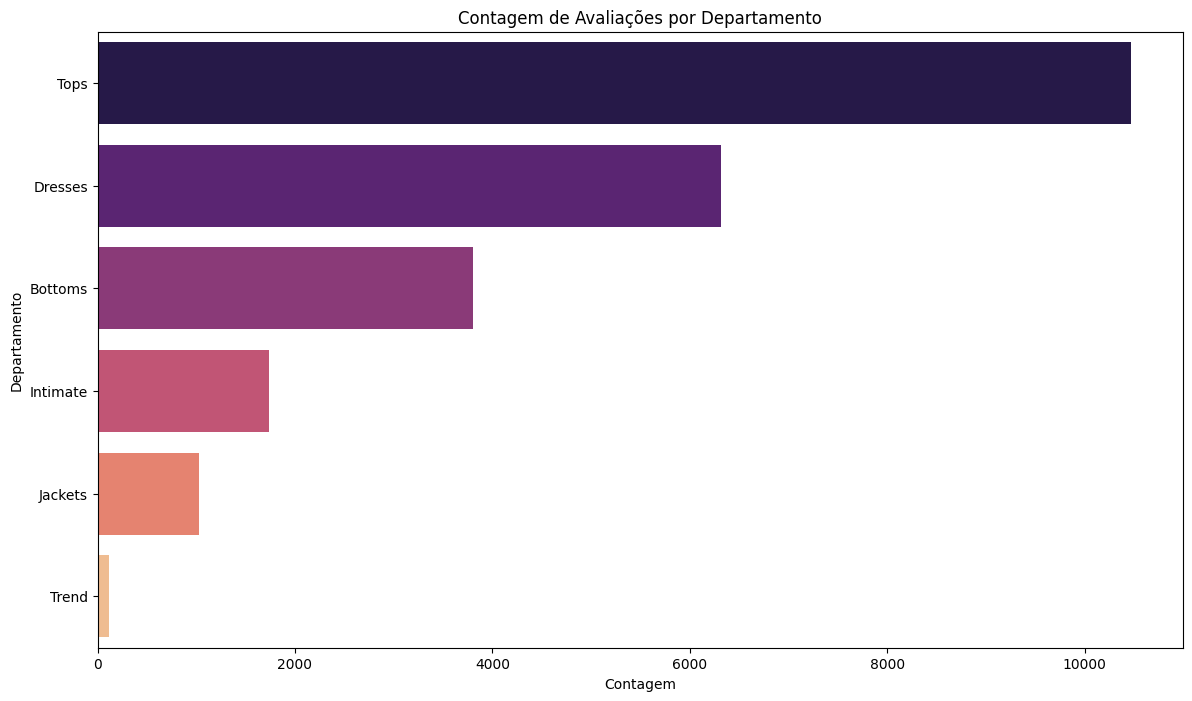

In [ ]:
# Plotar a contagem de avaliações por departamento
plt.figure(figsize=(14, 8))
sns.countplot(y='Department Name', data=df, palette='magma', order=df['Department Name'].value_counts().index)
plt.title('Contagem de Avaliações por Departamento')
plt.xlabel('Contagem')
plt.ylabel('Departamento')
plt.show()

## Contagem de Avaliações por Classe de Produto

<ipython-input-10-c5dd2428ed74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Class Name', data=df, palette='cool', order=df['Class Name'].value_counts().index)


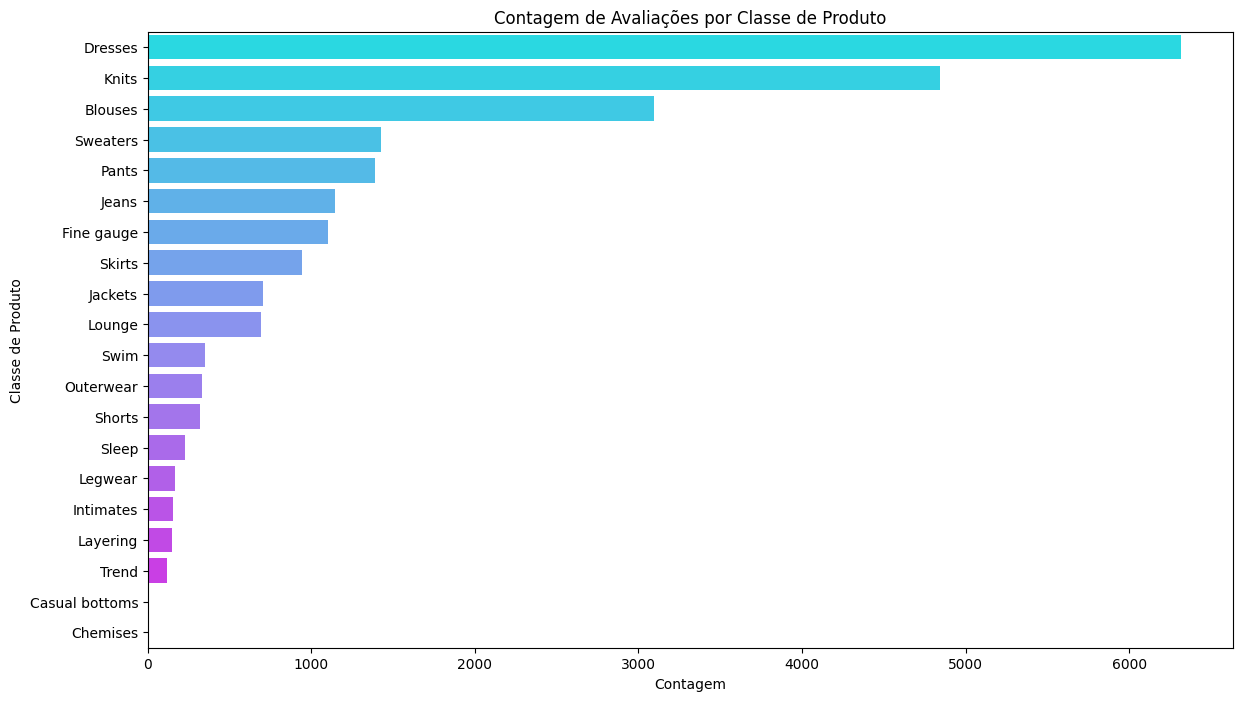

In [ ]:
# Plotar a contagem de avaliações por classe de produto
plt.figure(figsize=(14, 8))
sns.countplot(y='Class Name', data=df, palette='cool', order=df['Class Name'].value_counts().index)
plt.title('Contagem de Avaliações por Classe de Produto')
plt.xlabel('Contagem')
plt.ylabel('Classe de Produto')
plt.show()

## Análise de Feedback Positivo

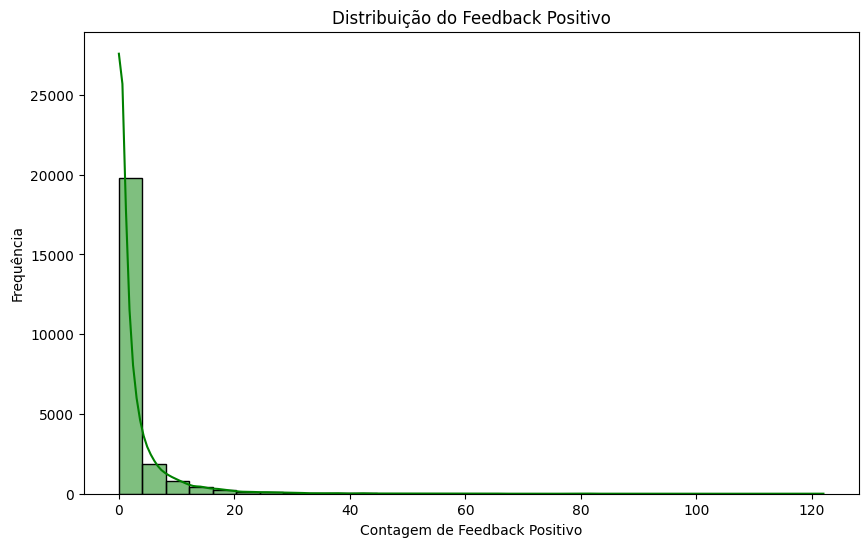

<ipython-input-11-6959ceb8a35a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Positive Feedback Count', data=feedback_avg, palette='rocket')


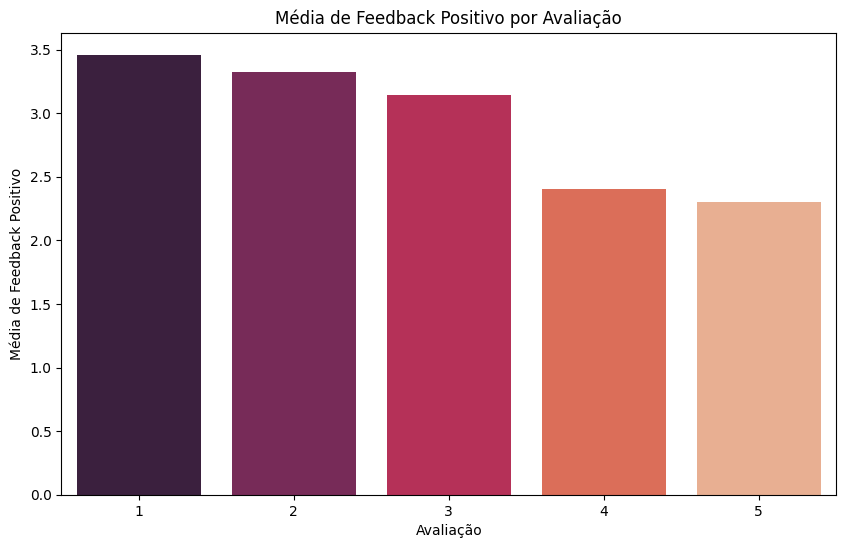

In [ ]:
# Plotar a distribuição do feedback positivo
plt.figure(figsize=(10, 6))
sns.histplot(df['Positive Feedback Count'], bins=30, kde=True, color='green')
plt.title('Distribuição do Feedback Positivo')
plt.xlabel('Contagem de Feedback Positivo')
plt.ylabel('Frequência')
plt.show()

# Calcular a média de feedback positivo por avaliação
feedback_avg = df.groupby('Rating')['Positive Feedback Count'].mean().reset_index()

# Plotar a média de feedback positivo por avaliação
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Positive Feedback Count', data=feedback_avg, palette='rocket')
plt.title('Média de Feedback Positivo por Avaliação')
plt.xlabel('Avaliação')
plt.ylabel('Média de Feedback Positivo')
plt.show()

## Análise de Recomendações

<ipython-input-12-62f4fef052e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommended IND', data=df, palette='viridis')


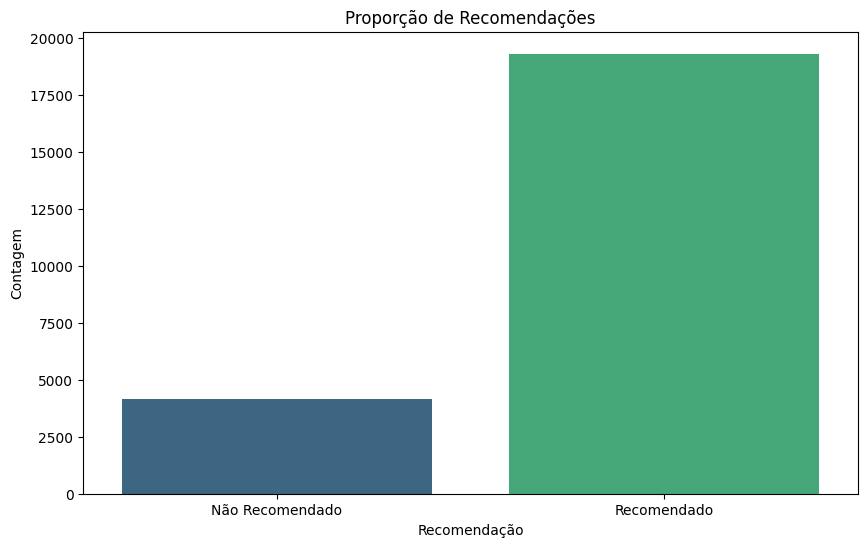

<ipython-input-12-62f4fef052e3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Recommended IND', data=recommendation_by_rating, palette='coolwarm')


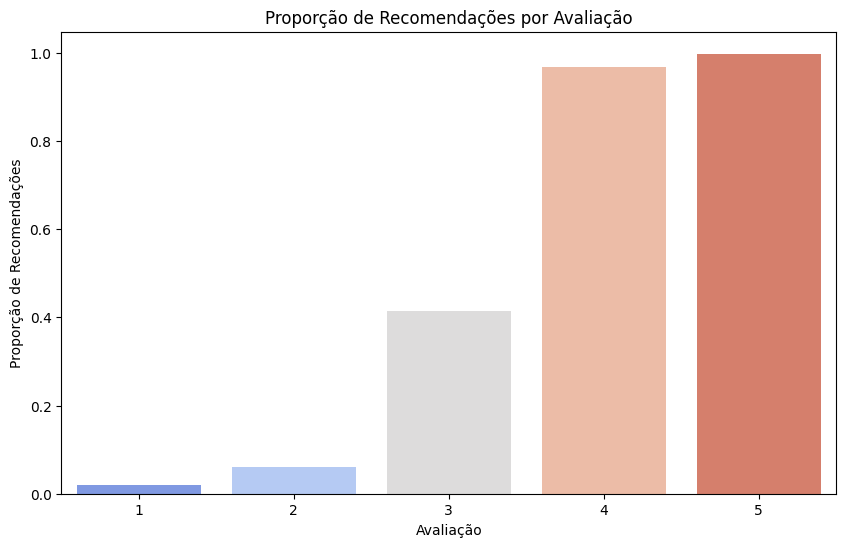

In [ ]:
# Plotar a proporção de recomendações
plt.figure(figsize=(10, 6))
sns.countplot(x='Recommended IND', data=df, palette='viridis')
plt.title('Proporção de Recomendações')
plt.xlabel('Recomendação')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não Recomendado', 'Recomendado'])
plt.show()

# Análise de recomendação por avaliação
recommendation_by_rating = df.groupby('Rating')['Recommended IND'].mean().reset_index()

# Plotar a proporção de recomendações por avaliação
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Recommended IND', data=recommendation_by_rating, palette='coolwarm')
plt.title('Proporção de Recomendações por Avaliação')
plt.xlabel('Avaliação')
plt.ylabel('Proporção de Recomendações')
plt.show()

## Análise de Tamanho do Texto das Avaliações

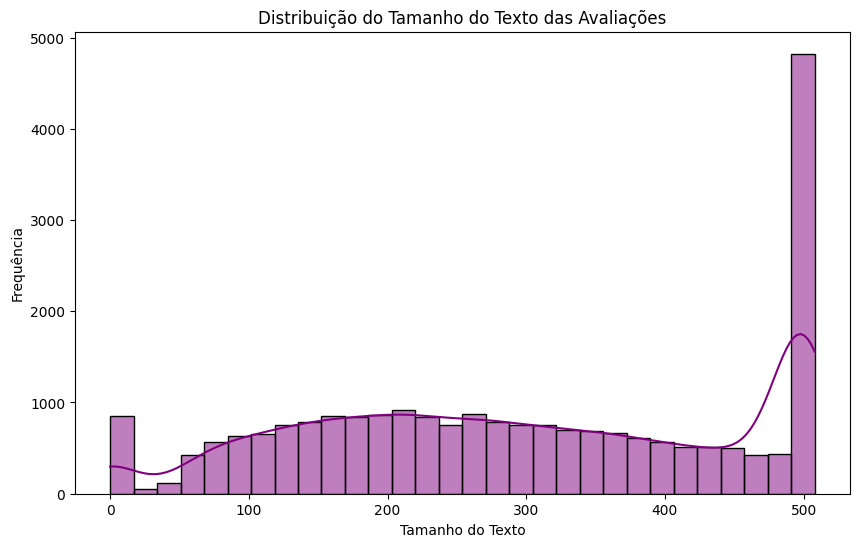

<ipython-input-13-d09eaafa6e3e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Review Length', data=length_by_rating, palette='cubehelix')


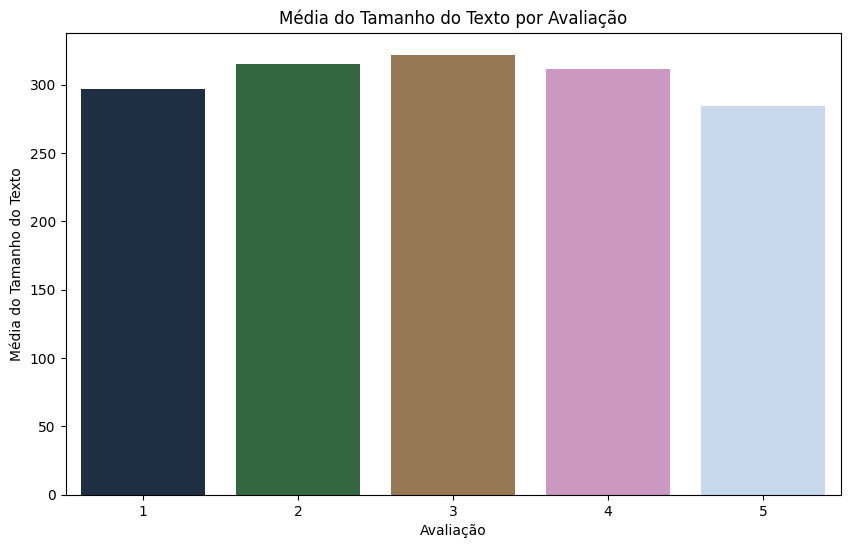

In [ ]:
# Calcular o tamanho do texto das avaliações
df['Review Length'] = df['Review Text'].apply(len)

# Plotar a distribuição do tamanho do texto das avaliações
plt.figure(figsize=(10, 6))
sns.histplot(df['Review Length'], bins=30, kde=True, color='purple')
plt.title('Distribuição do Tamanho do Texto das Avaliações')
plt.xlabel('Tamanho do Texto')
plt.ylabel('Frequência')
plt.show()

# Análise do tamanho do texto por avaliação
length_by_rating = df.groupby('Rating')['Review Length'].mean().reset_index()

# Plotar a média do tamanho do texto por avaliação
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Review Length', data=length_by_rating, palette='cubehelix')
plt.title('Média do Tamanho do Texto por Avaliação')
plt.xlabel('Avaliação')
plt.ylabel('Média do Tamanho do Texto')
plt.show()

## Nuvem de Palavras das Avaliações

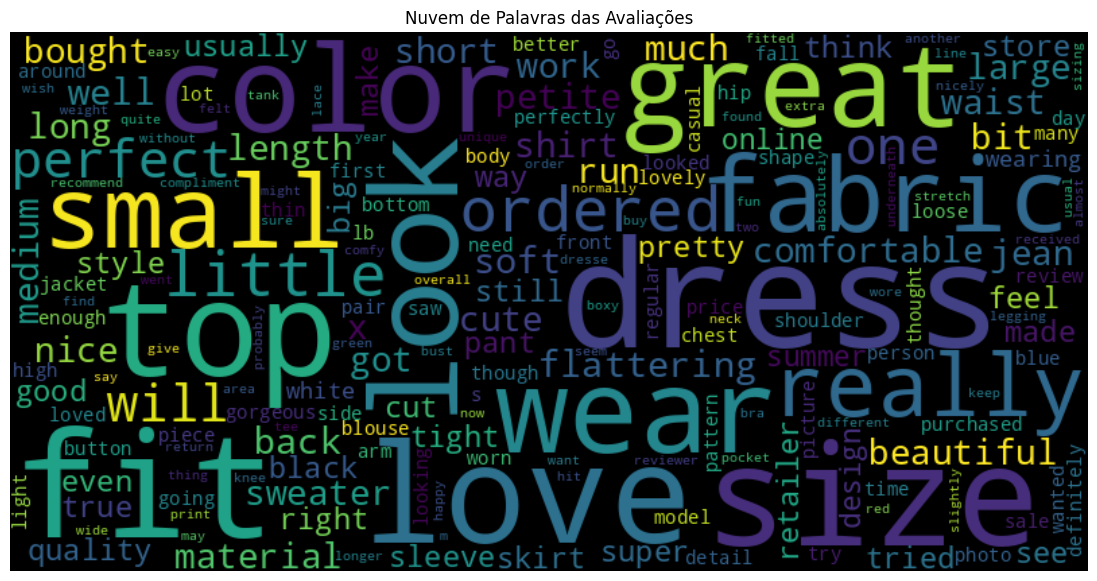

In [ ]:
from wordcloud import WordCloud

# Gerar uma nuvem de palavras para as avaliações
text = " ".join(review for review in df['Review Text'])

wordcloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(text)

# Plotar a nuvem de palavras
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras das Avaliações')
plt.axis('off')
plt.show()

## Correlação entre variáveis

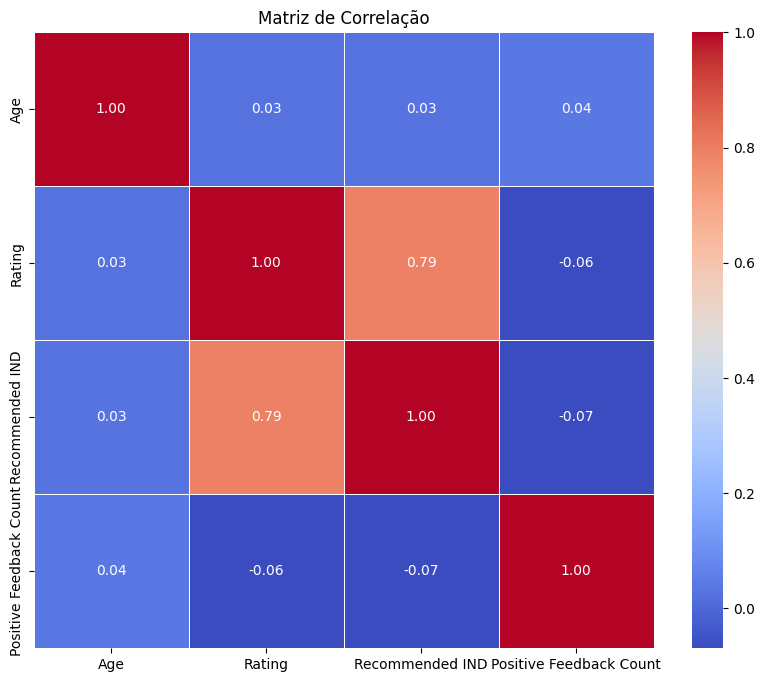

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age','Rating','Recommended IND', 'Positive Feedback Count']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

## Boxplot da Avaliação por Recomendação

<ipython-input-23-aacc629f6663>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Recommended IND', y='Rating', data=df, palette='viridis')


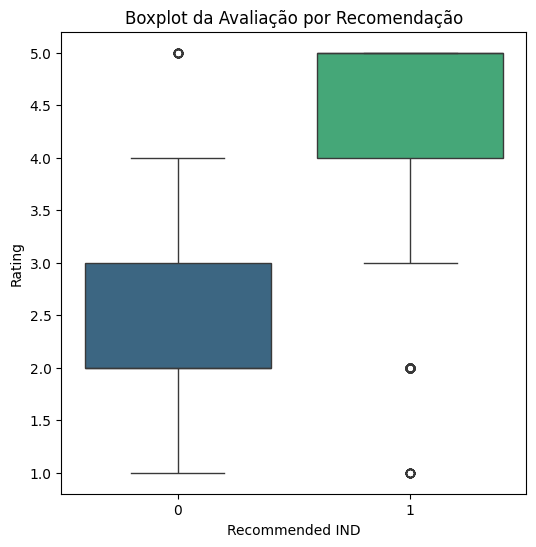

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Recommended IND', y='Rating', data=df, palette='viridis')
plt.title('Boxplot da Avaliação por Recomendação')
plt.xlabel('Recommended IND')
plt.ylabel('Rating')
plt.show()

## Quantidade de Notas 1 por Departamento

<ipython-input-30-ebd472f674b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_rated_departments.index, y=low_rated_departments.values, palette='magma')


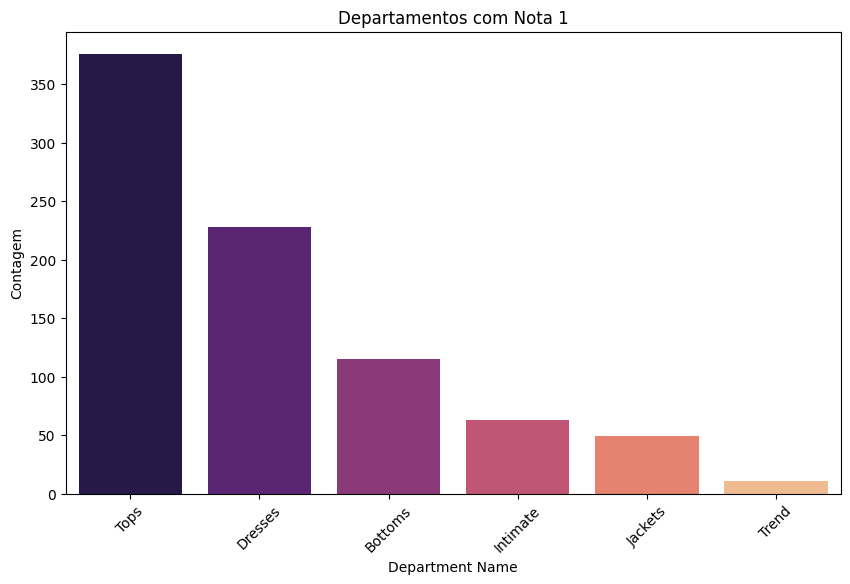

In [ ]:
low_rated_departments = df[df['Rating'] == 1]['Department Name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=low_rated_departments.index, y=low_rated_departments.values, palette='magma')
plt.title('Departamentos com Nota 1')
plt.xlabel('Department Name')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

## Quantidade de Notas 1 por Divisão

<ipython-input-32-a95598509df0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_rated_divisions.index, y=low_rated_divisions.values, palette='magma')


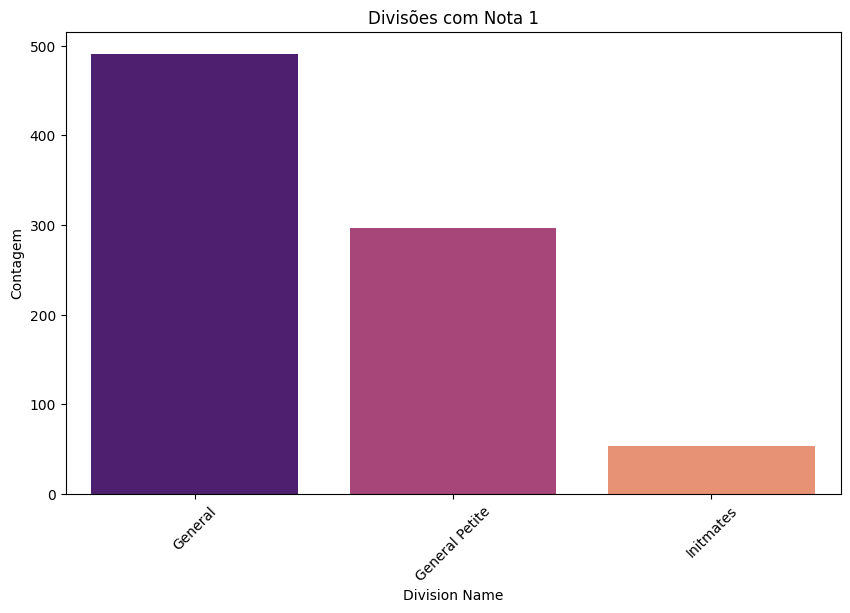

In [ ]:
low_rated_divisions = df[df['Rating'] == 1]['Division Name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=low_rated_divisions.index, y=low_rated_divisions.values, palette='magma')
plt.title('Divisões com Nota 1')
plt.xlabel('Division Name')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Modelagem

## Tratamento dos dados para a modelagem

In [ ]:
import pandas as pd
from keras.optimizers import Adam
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, SpatialDropout1D
from sklearn.preprocessing import StandardScaler
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.python.keras import backend as K
import torch
from transformers import DistilBertTokenizer, DistilBertModel
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.preprocessing import label_binarize

## Modelos utilizados

### Modelo Baseline - Floresta Aleatória com TF-IDF

#### Tratamento do texto

**TF-IDF** é uma técnica estatística que reflete a importância de uma palavra em um documento em relação a uma coleção de documentos (ou corpus). O método é uma combinação de duas métricas: TF (Term Frequency) e IDF (Inverse Document Frequency).

**Term Frequency (TF)** é uma medida da frequência de uma palavra em um documento.

**Inverse Document Frequency (IDF)** é uma medida de quantas vezes uma palavra aparece nos documentos do corpus. A ideia é diminuir o peso das palavras muito comuns e aumentar o peso das palavras que são raras.

<br>

A métrica TF-IDF é calculada multiplicando-se o TF pelo IDF:

<br>

$TF-IDF(t,d,D)=TF(t,d)×IDF(t,D)$, em que:

<br>

$𝑡$ é o termo (palavra) específico.

$𝑑$ é um documento específico.

$𝐷$ é o corpus (coleção de todos os documentos).

In [ ]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df['Combined_Text']).toarray()

print(X_text)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Tratamento das variáveis numéricas

Padronizamos os dados numéricos com StandardScaler.

In [ ]:
# Padronização dos dados
scaler = StandardScaler()
X_other = scaler.fit_transform(df.drop(['Rating', 'Title', 'Review Text', 'Combined_Text'], axis=1))

#### Variáveis da modelagem

Chamamos as covariáveis de `X` e a variável resposta de `y`.



In [ ]:
# Juntando os dados textuais e numéricos tratados
X = np.concatenate((X_text, X_other), axis=1)
y = df['Rating']

Separamos os dados em treino e teste.

In [ ]:
# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### Treinamento

Treinamos o modelo Random Forest com os dados de treinamento.

In [ ]:
# Treinando o modelo com os dados
model = RandomForestClassifier(n_estimators=100, random_state=123)
model_fitted = model.fit(X_train, y_train)

Chamamos de `y_pred` as predições do modelo com os dados de teste.

In [ ]:
# Predições
y_pred = model_fitted.predict(X_test)

#### Métricas

##### Classification Report

In [ ]:
# Avaliar o modelo
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia - Floresta Aleatória: {acuracia}')
print(classification_report(y_test, y_pred))

Acurácia - Floresta Aleatória: 0.633886760323542
              precision    recall  f1-score   support

           1       0.56      0.06      0.10       163
           2       0.38      0.15      0.22       285
           3       0.42      0.42      0.42       549
           4       0.50      0.07      0.12      1042
           5       0.68      0.99      0.80      2659

    accuracy                           0.63      4698
   macro avg       0.51      0.34      0.33      4698
weighted avg       0.59      0.63      0.55      4698



* **Classe 1**: Para a Classe 1, a precisão é relativamente alta (0.56), o que significa que quando o modelo prevê esta classe, ele está correto 56% das vezes. No entanto, o recall é extremamente baixo (0.06), indicando que apenas 6% das instâncias reais desta classe são corretamente identificadas pelo modelo. O f1-score também é baixo (0.10), refletindo o equilíbrio entre precisão e recall. O suporte é 163, indicando o número de instâncias reais desta classe.

* **Classe 2**: Para a Classe 2, a precisão é de 0.38, indicando que o modelo é correto em 38% das previsões desta classe. O recall é 0.15, mostrando que 15% das instâncias reais desta classe são corretamente identificadas. O f1-score é 0.22, refletindo o desempenho intermediário entre precisão e recall. O suporte é 285.

* **Classe 3**: Para a Classe 3, a precisão e o recall são ambos 0.42, o que é melhor equilibrado em comparação com as Classes 1 e 2. O f1-score é 0.42, indicando um desempenho médio. O suporte é 549.

* **Classe 4**: Para a Classe 4, a precisão é 0.50, mas o recall é muito baixo (0.07), indicando que apenas 7% das instâncias reais são corretamente identificadas. O f1-score é 0.12, refletindo um desempenho fraco. O suporte é 1042.

* **Classe 5**: Para a Classe 5, a precisão é 0.68, indicando que 68% das previsões desta classe são corretas. O recall é muito alto (0.99), significando que 99% das instâncias reais são identificadas corretamente. O f1-score é 0.80, refletindo um desempenho robusto. O suporte é 2659.

* **Análise Global**: A acurácia geral é 0.63, indicando um desempenho moderado do modelo. A macro média, que é a média aritmética das métricas de todas as classes, mostra valores relativamente baixos para precisão, recall e f1-score, sugerindo que o modelo não está performando bem de forma consistente em todas as classes. A weighted média, que leva em consideração o suporte de cada classe, mostra uma precisão de 0.59, recall de 0.63 e f1-score de 0.55.

##### Matriz de Confusão

Avaliação do modelo com Matriz de Confusão.

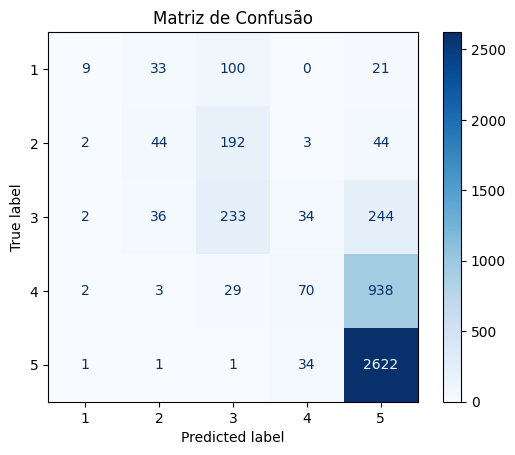

In [ ]:
# Supondo que y_true e y_pred são os valores verdadeiros e previstos, respectivamente
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_fitted.classes_)
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Matriz de Confusão')
plt.show()

* **Classe 1**: Das 163 instâncias verdadeiras da Classe 1, apenas 9 foram corretamente classificadas como 1. Um número significativo foi classificado incorretamente como 3 (100 instâncias) e 2 (33 instâncias). Isso explica o baixo recall e f1-score para esta classe.

* **Classe 2**: Das 285 instâncias verdadeiras da Classe 2, 44 foram corretamente classificadas como 2. Um número muito maior foi classificado incorretamente como 3 (192 instâncias), seguido por 44 instâncias como 5. Isso contribui para o baixo recall e f1-score.

* **Classe 3**: Para as 549 instâncias verdadeiras da Classe 3, 233 foram corretamente classificadas como 3. No entanto, um número substancial foi classificado como 5 (244 instâncias) e 36 como 2. Isso indica um certo grau de confusão entre as classes 3 e 5.

* **Classe 4**: Para as 1042 instâncias verdadeiras da Classe 4, apenas 70 foram corretamente classificadas como 4, enquanto a grande maioria foi classificada incorretamente como 5 (938 instâncias). Este alto grau de confusão com a Classe 5 explica o baixo recall e f1-score para a Classe 4.

* **Classe 5**: Das 2659 instâncias verdadeiras da Classe 5, 2622 foram corretamente classificadas como 5, mostrando um alto recall. Apenas 37 instâncias foram classificadas incorretamente, o que explica o alto desempenho em termos de recall e f1-score.

</br></br>

* **Conclusão**:

  A matriz de confusão revela algumas tendências importantes:

  **Classe 5:** O modelo é extremamente eficaz em identificar instâncias da Classe 5, com muito poucas classificações incorretas.

  **Classes 1 e 4:** Há uma significativa confusão com outras classes, especialmente com a Classe 5, resultando em baixas métricas de desempenho.

  **Classes 2 e 3:** Embora haja algum nível de precisão, muitas instâncias são classificadas incorretamente, especialmente como Classe 3 e Classe 5.

  Essa análise sugere que o modelo tem dificuldades em distinguir entre várias classes, especialmente quando há uma classe dominante como a Classe 5. Ajustes adicionais, como balanceamento das classes, engenharia de características ou ajuste de hiperparâmetros do modelo, podem ser necessários para melhorar o desempenho nas classes menos representadas.

##### AUC

In [ ]:
# Calcular AUC para problemas multiclasse especificando 'ovo' ou 'ovr'
# y_pred_prob deve ser um array de shape (n_samples, n_classes)
auc_ovo = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')  # One-vs-One
auc_ovr = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # One-vs-Rest

print(f'AUC (One-vs-One): {auc_ovo}')
print(f'AUC (One-vs-Rest): {auc_ovr}')

AUC (One-vs-One): 0.8046315936824172
AUC (One-vs-Rest): 0.8722947129297557


* **AUC (One-vs-One)** de 0.8046: Indica um desempenho bom, mas não excelente, na distinção entre pares de classes. Há alguma confusão entre algumas classes, o que é consistente com a análise da matriz de confusão.

* **AUC (One-vs-Rest)** de 0.8723: Indica um desempenho muito bom na distinção de cada classe individual contra todas as outras. O modelo é mais eficaz quando se trata de identificar uma classe específica em comparação com as demais.

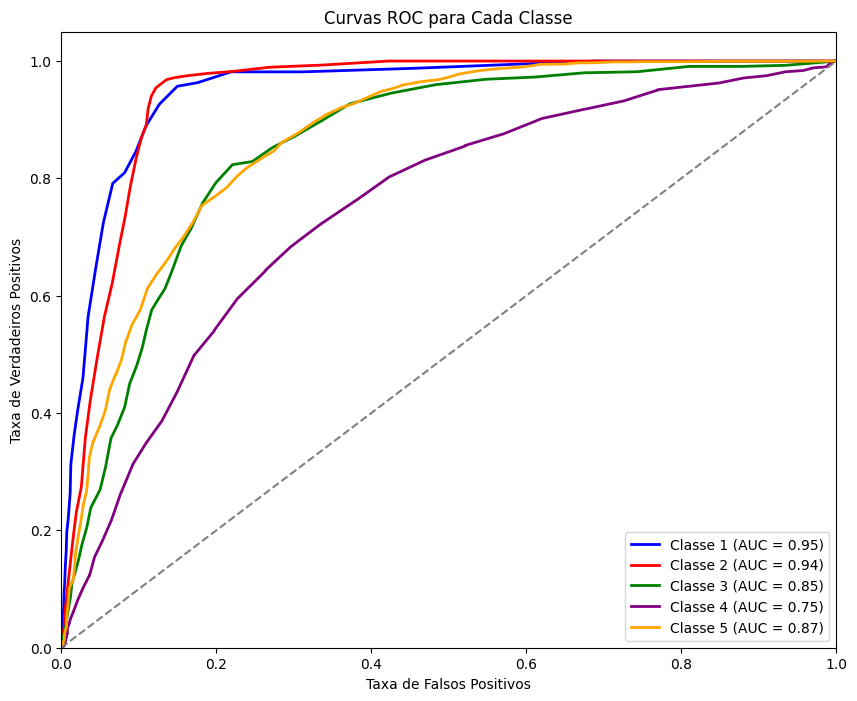

In [ ]:
# Prever probabilidades
y_pred_prob = model_fitted.predict_proba(X_test)

# Binarizar os rótulos verdadeiros
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Número de classes
n_classes = y_test_bin.shape[1]

# Inicializar variáveis para armazenar falsas taxas positivas (FPR), verdadeiras taxas positivas (TPR) e AUCs
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcular a curva ROC e AUC para cada classe
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar todas as curvas ROC
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple','orange']
for i, color in zip(range(n_classes), colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Classe {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC para Cada Classe')
plt.legend(loc="lower right")
plt.show()

* **Classes 1 e 2:** Desempenho excelente na distinção destas classes contra todas as outras. As curvas ROC para estas classes estariam muito próximas do canto superior esquerdo, indicando alta eficácia na classificação.

* **Classe 3:** Bom desempenho, mas não tão excelente quanto as Classes 1 e 2. A curva ROC estaria claramente acima da linha de chance, refletindo um bom equilíbrio entre verdadeiros positivos e falsos positivos.

* **Classe 4:** Desempenho razoável, mas há espaço significativo para melhorias. A curva ROC estaria mais próxima da linha de chance, indicando que o modelo tem dificuldades em distinguir esta classe das outras.

* **Classe 5:** Desempenho robusto, com a curva ROC bastante acima da linha de chance, mas não tão próxima do canto superior esquerdo quanto as curvas das Classes 1 e 2.

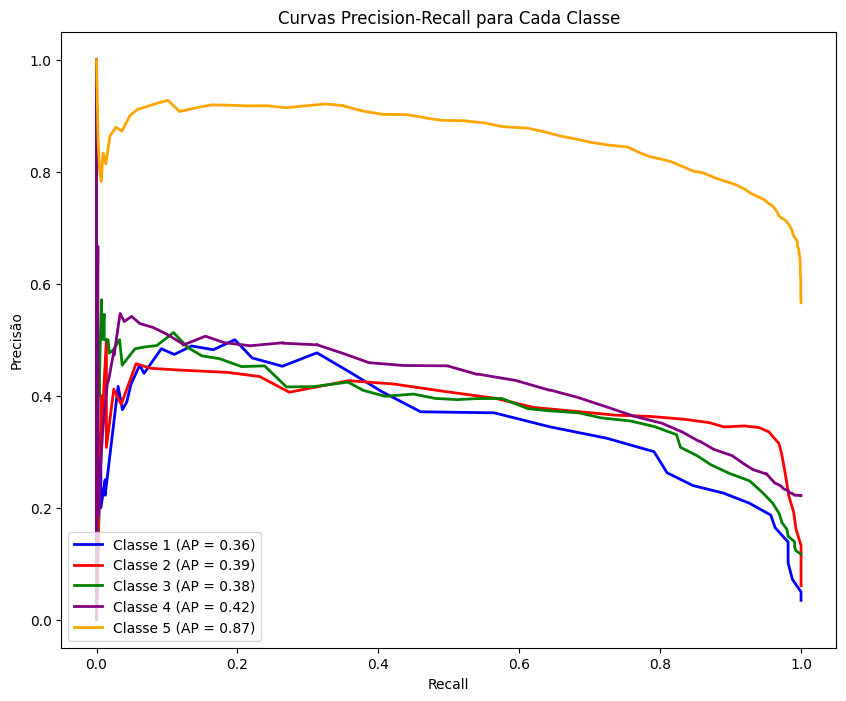

In [ ]:
# Prever probabilidades
y_pred_prob = model_fitted.predict_proba(X_test)

# Binarizar os rótulos verdadeiros com as classes originais (1, 2, 3, 4, 5)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Número de classes
n_classes = y_test_bin.shape[1]

# Inicializar variáveis para armazenar precisão, recall e AUCs
precision = dict()
recall = dict()
average_precision = dict()

# Calcular a curva Precision-Recall e AUC para cada classe
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

# Plotar todas as curvas Precision-Recall
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Classe {classes[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curvas Precision-Recall para Cada Classe')
plt.legend(loc="lower left")
plt.show()

* **Classe 1 (AP: 0.3569):** Desempenho relativamente fraco, indicando dificuldades em manter precisão enquanto maximiza o recall.

* **Classe 2 (AP: 0.3908):** Desempenho um pouco melhor do que a Classe 1, mas ainda não satisfatório.

* **Classe 3 (AP: 0.3811):** Desempenho moderado, indicando que o modelo lida um pouco melhor com esta classe, mas ainda não de forma ideal.

* **Classe 4 (AP: 0.4169):** Melhor desempenho comparado às Classes 1, 2 e 3, mas ainda longe de ser excelente.

* **Classe 5 (AP: 0.8654):** Excelente desempenho, refletindo a capacidade do modelo de manter alta precisão ao maximizar o recall, consistente com os resultados observados na matriz de confusão e AUC.

### Modelo Intermediário - Word2Vec + LSTM

As palavras em um texto aparecem em uma sequência específica. As Redes Neurais Recorrentes (RNN) são modelos que consideram essa sequência, processando as palavras na ordem em que surgem no texto. As Long Short-term Memory (LSTM) substituíram as RNNs tradicionais no campo de Aprendizado de Máquina. As células LSTM possuem variáveis internas que funcionam como uma memória, aumentando ligeiramente o custo computacional, o que geralmente é aceitável.

Na construção deste modelo, utilizamos embeddings de palavras, empregando a técnica Word2Vec. Esta técnica foi apresentada em 2013 (Mikolov, Tomas, et al. (2013). “Efficient Estimation of Word Representations in Vector Space”) e teve um impacto significativo no Processamento de Linguagem Natural. A técnica envolve descrever uma palavra usando um vetor de um tamanho específico (geralmente 100 ou 300). O vetor de uma palavra é definido pelo contexto em que aparece nos textos (ou seja, com base nas palavras ao seu redor). Tipicamente, word embbedings são treinadas em grandes volumes de texto, entretanto utilizaremos aqui para ilustrar e como estudo para a disciplina. Palavras com significados semelhantes (sinônimos) tendem a ficar próximas umas das outras neste espaço de palavras. A representação é “densa”, em comparação com a representação de vetor one-hot, que é “esparsa”.


A rotulagem da variável target não pode ser manipulada como texto e precisa ser convertida em um one-hot vector.

In [ ]:
import re
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Abaixo repetimos alguns tratamentos, para que não seja necessário rodar partes anteriores do código.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = 'https://drive.google.com/uc?export=download&id=1JWgFjXbFya5hClMEdnAxU9WELh4Vnh0a'
df1 = pd.read_csv(url, index_col=0)

df1['Rating'] = df1['Rating'].astype(int)
num_classes = df1['Rating'].nunique()
labels = to_categorical(df1['Rating'] - 1, num_classes=num_classes)

df1['Title'] = df1['Title'].fillna('')
df1['Review Text'] = df1['Review Text'].fillna('')
df1['Combined_Text'] = df1['Title'] + ' ' + df1['Review Text']


O código abaixo é uma função que processa `Combined_Text`, realizando uma série de operações de limpeza de texto.

- `re.sub` é uma função da biblioteca re que substitui partes de uma string com base em um padrão de expressão regular. O padrão [^A-Za-z0-9\']+ corresponde a qualquer sequência de caracteres que não sejam letras (maiúsculas ou minúsculas), dígitos ou apóstrofos. Esses caracteres são substituídos por um espaço (' ').

- O padrão [@] corresponde ao caractere '@'. O caractere '@' é removido da string (substituído por uma string vazia).

- `string.printable` é uma constante da biblioteca string que contém todos os caracteres considerados imprimíveis, incluindo letras, números, pontuação e espaço. A compreensão de lista [word for word in modified_string if word in string.printable] cria uma nova lista contendo apenas os caracteres da modified_string que estão presentes em string.printable. O método join une esses caracteres em uma nova string. A string resultante contém apenas caracteres imprimíveis, removendo quaisquer caracteres especiais ou de controle.

- `.str.lower()` converte todas as strings da coluna para minúsculas.

- Cada texto na coluna Combined_Text é processado pela função clean_text_processed, e o texto limpo é armazenado na coluna Processed_Text.



In [ ]:
def clean_text_processed(input_string):
    modified_string = re.sub('[^A-Za-z0-9\']+', ' ', input_string)
    #modified_string = re.sub('[0-9]+', ' ', modified_string)
    modified_string=re.sub("[@]","",modified_string)
    modified_string = ''.join([word for word in modified_string if word in string.printable])
    return(modified_string)
df1['Processed_Text'] = df1.Combined_Text.apply(clean_text_processed)
df1['Processed_Text']=df1['Processed_Text'].str.lower()
df1['Processed_Text']

0         absolutely wonderful silky and sexy and comfo...
1         love this dress it's sooo pretty i happened t...
2        some major design flaws i had such high hopes ...
3        my favorite buy i love love love this jumpsuit...
4        flattering shirt this shirt is very flattering...
                               ...                        
23481    great dress for many occasions i was very happ...
23482    wish it was made of cotton it reminds me of ma...
23483    cute but see through this fit well but the top...
23484    very cute dress perfect for summer parties and...
23485    please make more like this one this dress in a...
Name: Processed_Text, Length: 23486, dtype: object

Veja a coluna original 'Combined_Text' abaixo. O apóstrofo ' foi mantido.

In [ ]:
df1['Combined_Text']

0         Absolutely wonderful - silky and sexy and com...
1         Love this dress!  it's sooo pretty.  i happen...
2        Some major design flaws I had such high hopes ...
3        My favorite buy! I love, love, love this jumps...
4        Flattering shirt This shirt is very flattering...
                               ...                        
23481    Great dress for many occasions I was very happ...
23482    Wish it was made of cotton It reminds me of ma...
23483    Cute, but see through This fit well, but the t...
23484    Very cute dress, perfect for summer parties an...
23485    Please make more like this one! This dress in ...
Name: Combined_Text, Length: 23486, dtype: object

Modelo

- Carregamos uma lista de frases pré-processadas da coluna 'Processed_Text' de df1. Estas sentenças serão usadas para treinar o modelo Word2Vec.

- Extraimos os vetores de palavras do modelo Word2Vec treinado.

- Inicializamos e preenchemos a Matriz de Embeddings com os vetores de palavras gerados pelo Word2Vec. Apenas as palavras com índice menor que max_words são consideradas.

- Fazemos a tokenização das sentenças tokenizer = Tokenizer() cria um tokenizador para converter texto em sequências de inteiros. Depois utilizamos pad_sequences


In [ ]:
sentences = df1['Processed_Text'].tolist()

#Treinar o modelo Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

#Extrair o vocabulário do modelo
word_vectors = word2vec_model.wv

#Número máximo de palavras no vocabulário
max_words = 5000
maxlen = 250  # Tamanho máximo da sequência

#Inicializar a matriz de embeddings com zeros
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

#Preencher a matriz de embeddings com vetores de palavras do Word2Vec
for word, i in word2vec_model.wv.key_to_index.items():
    if i < max_words:
        embedding_matrix[i] = word_vectors[word]

#Tokenizer
max_words = 5000
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df1['Processed_Text'])
#vocabulary_size = len(tokenizer.word_index) + 1
#print(f'Vocabulary size : {vocabulary_size}')
X = tokenizer.texts_to_sequences(df1['Processed_Text'])
X = pad_sequences(X, maxlen=250)

In [ ]:
print(f'Shape de X: {X.shape}')

Shape de X: (23486, 250)


Fazemos a codificação  de Rating e a divisão de dados. Criamos um codificador para transformar rótulos categóricos em inteiros. Depois convertemos os rótulos para o formato one-hot encoding com 5 classes.

Dividimos os dados em conjuntos de treino, validação e teste. test_size=0.2 indica que 20% dos dados são reservados para validação e teste.

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df1['Rating'])
y = to_categorical(y, num_classes=5)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Construimos o modelo LSTM.

Criamos um modelo sequencial e adicionamos uma camada de embedding com Embedding(). Adicionamos dropout espacial para prevenir overfitting.  Adiciona uma camada LSTM com 100 unidades e dropout para regularização. Adicionamos uma camada densa com ativação softmax para classificação, para uma distribuição de probabilidade para cada label.

Após isso, compilamos o modelo, com o otimizador Adam com learning rate de 0.001. Usamos a cross entropy categórica e monitoramos a acurácia.

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Treinando o modelo
epochs = 6
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/6
294/294 [==============================] - 213s 697ms/step - loss: 1.0333 - accuracy: 0.5927 - val_loss: 0.9143 - val_accuracy: 0.6258
Epoch 2/6
294/294 [==============================] - 191s 649ms/step - loss: 0.8286 - accuracy: 0.6550 - val_loss: 0.8520 - val_accuracy: 0.6309
Epoch 3/6
294/294 [==============================] - 202s 686ms/step - loss: 0.7540 - accuracy: 0.6841 - val_loss: 0.8252 - val_accuracy: 0.6513
Epoch 4/6
294/294 [==============================] - 201s 683ms/step - loss: 0.6970 - accuracy: 0.7126 - val_loss: 0.8493 - val_accuracy: 0.6501
Epoch 5/6
294/294 [==============================] - 202s 687ms/step - loss: 0.6608 - accuracy: 0.7325 - val_loss: 0.8681 - val_accuracy: 0.6386
Epoch 6/6
294/294 [==============================] - 202s 687ms/step - loss: 0.6248 - accuracy: 0.7461 - val_loss: 0.8697 - val_accuracy: 0.6556


In [ ]:
# Avaliação do modelo
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy}')

74/74 [==============================] - 12s 147ms/step
Accuracy: 0.6551724137931034


Para fazer o teste com alguns textos, criamos uma pipeline.

- Limpeza do Texto: Os textos são limpos removendo caracteres especiais e mantendo apenas letras, números e apóstrofos. Também são eliminados caracteres não imprimíveis.
- Tokenização e Padronização: Os textos limpos são convertidos em sequências de inteiros com comprimento fixo.
- Predição: As sequências são usadas para fazer previsões de classificação usando o modelo LSTM, que fornece a classe de maior probabilidade para cada texto.

Este código é útil para preprocessar texto e classificá-lo usando o modelo treinado de LSTM.

In [ ]:
def clean_text_processed(input_string):
    modified_string = re.sub('[^A-Za-z0-9\']+', ' ', input_string)
    #modified_string = re.sub('[0-9]+', ' ', modified_string)
    modified_string=re.sub("[@]","",modified_string)
    modified_string = ''.join([word for word in modified_string if word in string.printable])
    return(modified_string)

def tokenize_and_pad(texts, tokenizer):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=250)
    return padded_sequences

def text_pipeline(texts, tokenizer, model):
    # Limpeza dos textos
    cleaned_texts = [clean_text_processed(text) for text in texts]

    # Tokenização e padronização
    tokenized_texts = tokenize_and_pad(cleaned_texts, tokenizer)

    # Predição usando o modelo LSTM
    predictions = model.predict(tokenized_texts)
    y_pred_classes = predictions.argmax(axis=-1)

    return print(f"Rating prediction: {y_pred_classes}")

Aplicando a pipeline, temos

In [ ]:
texts = ["I Love it! Best clothes",  "Average. Fits ok", "Bad. Poor material", "The design is awful", "So nice, but it came in a different size"]

text_pipeline(texts, model = model, tokenizer=tokenizer)

1/1 [==============================] - 0s 119ms/step
Rating prediction: [4 3 0 1 3]


Ou seja, "I Love it! Best clothes" recebeu o rating 5, "Average. Fits ok" recebeu rating igual a 4, assim como "So nice, but it came in a different size". "Bad. Poor material" recebeu rating igual a 1 e "The design is awful" rating igual a 2. Pensando de forma generalista, aparentemente apenas o "Fits ok" parece ter uma pontuação um pouco inadequada.

No modelo de RNN com o uso de Word2Vec, a representação das palavras que temos não leva em conta o contexto em que a palavra é aplicada. Por exemplo, nas frases: "Eu fiz um empréstimo no banco." e "Estou sentado em um banco.", a palavra "banco" tem um significado completamente diferente. Ou então, em nosso contexto de e-commerce de roupas femininas, temos os exemplos “The material of this t-shirt keeps you cool in hot weather” versus “This jacket looks so cool, I get compliments all the time”. Ou "The shirt tears apart at the seams" versus “The dress is so beautiful, it brings tears to my eyes”.

Logo, vemos que a presença de uma palavra pode significar diferentes coisas, fazendo com que todo o contexto seja importante. O modelo BERT se destaca, resolvendo este problema.

### Modelo Avançado - BERT

BERT (Bidirectional Encoder Representations from Transformers) é um modelo de linguagem pré-treinado que usa transformadores para entender o contexto bidirecional de uma palavra em uma frase. BERT tem demonstrado resultados de ponta em várias tarefas de NLP e é particularmente eficaz para análise de sentimento devido à sua capacidade de capturar nuances contextuais complexas.

O processo de treinamento consistirá em chamar um modelo BERT pré-treinado (bert-base-uncased) e realizar uma ajuste fino utilizando a biblioteca 'trainer' do hugging face. Este processo envolve ajustar os pesos pré-treinados do modelo com base nos dados específicos obtidos

BERT

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
pip install transformers[torch]

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, Trainer, TrainingArguments, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

Tratando os dados antes de colocar no modelo

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1JWgFjXbFya5hClMEdnAxU9WELh4Vnh0a'
df1 = pd.read_csv(url, index_col=0)

df1['Title'] = df1['Title'].fillna('')
df1['Review Text'] = df1['Review Text'].fillna('')
df1['Combined_Text'] = df1['Title'] + ' ' + df1['Review Text']

df2 = df1.sample(frac=0.85, random_state=42).reset_index(drop=True)
df3 = df1.drop(df2.index).reset_index(drop=True)

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# Criando uma função de Pré-processamento onde "tokenizaremos" os dados
def preprocess_function(examples):
    return tokenizer(examples['Combined_Text'], truncation=True, padding='max_length', max_length=512)

# Criar um Data Frame que terá as avaliações textuais e seu respectivo rating, que funcionara como label
data = df2[['Combined_Text', 'Rating']].copy()
dataset = Dataset.from_pandas(data)
# 'Tokenizar' os textos
tokenized_data = dataset.map(preprocess_function, batched=True)


train_test_split = tokenized_data.train_test_split(test_size=0.2, seed=123)
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

def add_labels(example):
    example['labels'] = example['Rating'] - 1  # Ajuste o rótulo para ser zero-indexado
    return example

train_dataset = train_dataset.map(add_labels)
test_dataset = test_dataset.map(add_labels)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/19963 [00:00<?, ? examples/s]

Map:   0%|          | 0/15970 [00:00<?, ? examples/s]

Map:   0%|          | 0/3993 [00:00<?, ? examples/s]

Pós-treinamento do modelo com a biblioteca Trainer. Chamaremos um modelo pré treinado com a AutoModelForSequenceClassification. Em seguida, realizaremos o refinamento do modelo. Para rotinas de refinamento (com modelos pré-treinados) o que achamos na literatura foi de que 3 épocas seriam suficientes para testes iniciais. Assim utilizaremos apenas 3 épocas com um learning rate bem baixo.

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

model.save_pretrained('./model_sentimento')
tokenizer.save_pretrained('./token_sentimento')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.878800,0.696533
2,0.648800,0.711973
3,0.514600,0.746443


('./token_piriguete/tokenizer_config.json',
 './token_piriguete/special_tokens_map.json',
 './token_piriguete/vocab.txt',
 './token_piriguete/added_tokens.json',
 './token_piriguete/tokenizer.json')

In [ ]:
trainer.evaluate()

{'eval_loss': 0.7447202205657959,
 'eval_runtime': 145.7542,
 'eval_samples_per_second': 32.232,
 'eval_steps_per_second': 2.017,
 'epoch': 3.0}

Experimentando alguns textos no nosso modelo

In [ ]:
from transformers import pipeline, BertForSequenceClassification, BertTokenizer
model_path = './model_sentimento'
token_path = './token_sentimento'
tokenizer1 = BertTokenizer.from_pretrained(token_path)
modelo = BertForSequenceClassification.from_pretrained(model_path)


classifier = pipeline("text-classification", model=modelo, tokenizer=tokenizer1)


texto1 = "I Love it! Best clothes"
texto2 = "Average. Fits Ok"
texto3 = "1 star"
texto4 = "Bad. Poor material"
# Classificar o texto
result1 = classifier(texto1)
result2 = classifier(texto2)
result3 = classifier(texto3)
result4 = classifier(texto4)

print(result1)
print(result2)
print(result3)
print(result4)

[{'label': 'LABEL_4', 'score': 0.9792906641960144}]
[{'label': 'LABEL_2', 'score': 0.6192447543144226}]
[{'label': 'LABEL_4', 'score': 0.62944495677948}]
[{'label': 'LABEL_0', 'score': 0.7935125827789307}]


Agora aplicando o conjunto de teste para obtenção da acurácia

In [ ]:
from sklearn.metrics import accuracy_score
classifier = pipeline("text-classification", model=modelo, tokenizer=tokenizer1)
texts = df3['Combined_Text'].tolist()
results = classifier(texts)
df3['Predictions'] = [int(result['label'].split('_')[-1]) + 1 for result in results]

In [ ]:
accuracy = accuracy_score(df3['Rating'], df3['Predictions'])
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.82


### BERT embeddings com Floresta aleatória

Agora vamos tentar extrais os embeddings do modelo BERT e utiliza-los numa floresta aleatória. Utilizaremos uma função que irá extrair os embeddings do df3, que possui 15% dos dados da base para treinar. A ideia é que como o processo de extração é demorado, reduziremos a quantidade de dados para estudo

In [ ]:
from transformers import BertModel, BertTokenizer

modelo = BertModel.from_pretrained('./model_sentimento')
texts = df3['Combined_Text'].tolist()

# Função para extrair embeddings
def extract_embeddings(text):
    inputs = tokenizer1(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():  # Desativando o cálculo de gradientes. Não tenho certeza se é necessário
        outputs = modelo(**inputs)
    last_hidden_state = outputs.last_hidden_state
    cls_embedding = last_hidden_state[:, 0, :]
    return cls_embedding.detach().numpy()

embeddings = [extract_embeddings(text) for text in texts]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

labels = df3['Rating']
# Tratando os dados para a floresta aleatória
X = np.array(embeddings).reshape(len(embeddings), -1)
y = np.array(labels)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

Agora para o texte, utilizaremos uma fração do df2 e realizaremos o mesmo processo de extração de embeddings antes de testar

In [ ]:
df4 = df2.sample(frac=0.30, random_state=42).reset_index(drop=True)
texts_test = df4['Combined_Text'].tolist()

# Extrair embeddings do teste
embeddings_test = [extract_embeddings(text) for text in texts_test]
X_test = np.array(embeddings_test).reshape(len(embeddings_test), -1)

In [ ]:
y_test = np.array(df4['Rating'])
predictions = rf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, predictions))

Acurácia: 0.8512322179923862


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.80      0.65      0.72       371
           2       0.65      0.67      0.66       646
           3       0.76      0.71      0.74      1227
           4       0.79      0.75      0.77      2177
           5       0.92      0.96      0.94      5561

    accuracy                           0.85      9982
   macro avg       0.78      0.75      0.76      9982
weighted avg       0.85      0.85      0.85      9982



Podemos concluir que a ideia de extrair os embeddings do BERT e aplicar numa floresta aleatória, além de muito interessante, trouxe bons resultados. Primeiro podemos citar a boa acurácia, mesmo treinando o modelo com poucos dados (apenas 15% do total da base), obteve a maior acurácia. Em segundo, num cenário onde já se possua um modelo BERT básico, a implementação desta ideia não é tão cara computacionalmente.